## Пример с задачей комивояжёра

In [1]:
%pip install pygad

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pygad
import numpy
from numpy.linalg import norm
import matplotlib.pyplot as plt
import random
%matplotlib inline

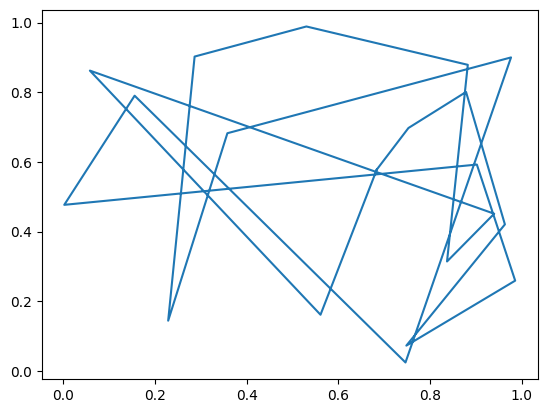

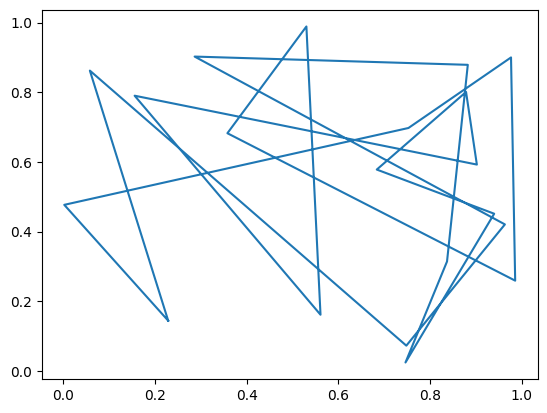

In [3]:
POP_SIZE = 50
POINT_NUM = 20
GEN_NUM = 500

shop_coordinates = numpy.random.uniform(size=(POINT_NUM, 2))

def plot_solution(solution):
    plt.plot(
        *tuple(
            [
                shop_coordinates[solution[i], k]
                for i in list(range(len(solution))) + [0]
            ]
            for k in range(2)
        )
    )

initial_pop = [list(range(POINT_NUM)) for _ in range(POP_SIZE)]
for l in initial_pop:
    random.shuffle(l)

plot_solution(initial_pop[0])
plt.show()
plot_solution(initial_pop[1])

In [4]:
def mutation_func(offspring, ga_instance):
    i = random.randint(0, len(offspring) - 1)
    j = random.randint(0, len(offspring) - 1)
    offspring[i], offspring[j] = offspring[j], offspring[i]
    return offspring

def fitness_func(ga_instance, solution, solution_idx):
    path = sum(
        norm(
            shop_coordinates[solution[i]] -
            shop_coordinates[solution[(i + 1) % len(solution)]]
        )
        for i in range(len(solution))
    )
    return -path

In [5]:
def crossover_func(parents, offspring_size, ga_instance):
 
    offsprings = []
    
    for _ in range(offspring_size[0]): # сколько нужно наплодить
        mother_index = random.randint(0, parents.shape[0] - 1)
        father_index = mother_index
        while father_index == mother_index:
            father_index = random.randint(0, parents.shape[0] - 1)
        mother = parents[mother_index, :]
        father = parents[father_index, :]

        offspring = mother.copy() # копия мамы

        # Упорядочим часть маминых точек, как у папы
        b = random.randint(0, len(offspring)-1)
        e = random.randint(0, len(offspring)-1)
        b, e = min(b, e), max(b, e)

        hps = set(offspring[b:e])

        newps = []
        for p in father:
            if p in hps:
                newps.append(p)

        offspring[b:e] = newps
        
        offsprings.append(offspring)
    
    return numpy.array(offsprings)

In [6]:
ga_instance = pygad.GA(
    parallel_processing=4,
    num_generations=GEN_NUM,
    num_parents_mating=10,
    sol_per_pop=POP_SIZE,
    gene_type=int, # а то сделает всё float
    initial_population=initial_pop,
    fitness_func=fitness_func,
    crossover_type=crossover_func,
    mutation_type=mutation_func
)

In [7]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

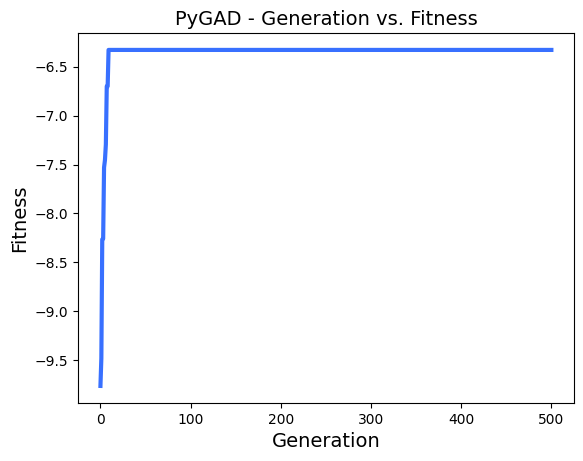

Parameters of the best solution : [16 11  2  5  1 19  9  4 10 17  0 14  3  6 18 12 13 15  8  7]
Fitness value of the best solution = -6.329061679508545


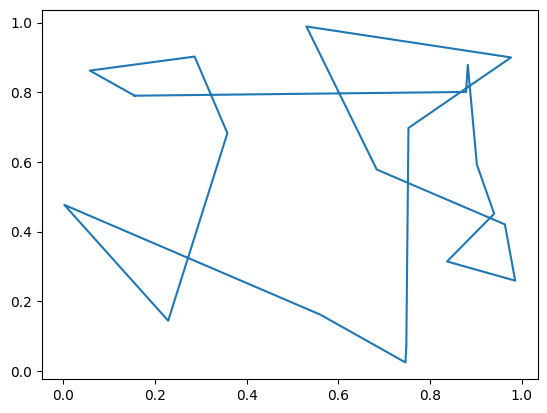

In [8]:
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

plot_solution(solution)